# Testing Axonal Contamination

Axons propagate somatic signal within 5ms time - more or less instantly with respect to 50ms sampling timescale. So, observing axons from another population is effectively crosstalk between instantainous signals.

**Model 1**: Testing Bivariate Effects
* 2 Regions connected with a certain lag
* Add symmetric cross-talk of a factor alpha
* Estimate FC, test FP and FN for a range of lags

**Model 2**: Extended Bivariate Effects
* Same as model 1, add kernel convolution

**Model 3**: Mivariate Effects
* Chain Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mesostat.metric.metric import MetricCalculator

from models import two_node_system

In [2]:
def acc(mat, nTest):
    return np.sum(np.diag(mat)).astype(float) / nTest / mat.shape[0]

def acc_te_lag_corrected(mat, nTest):
    diagSum = np.sum(mat.diagonal(offset=1)) + mat[-1][-1]
    return diagSum.astype(float) / nTest / mat.shape[0]

In [3]:
mc = MetricCalculator(serial=True, verbose=False)

Doing method crosscorr raw


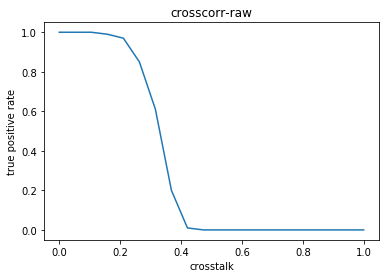

Doing method crosscorr conv


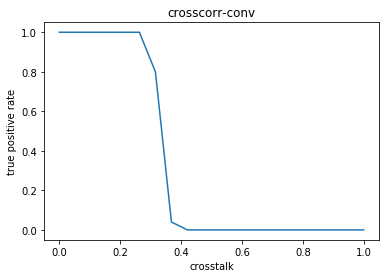

Doing method cross_MI raw


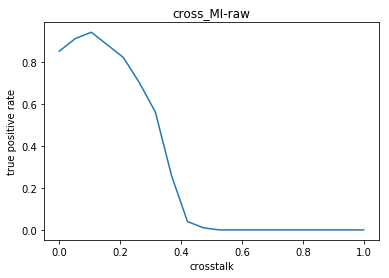

Doing method cross_MI conv


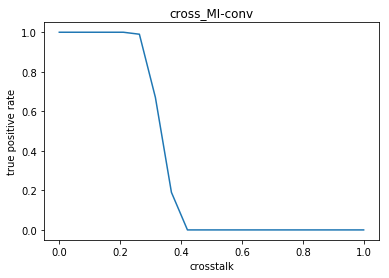

In [10]:
nTest = 20
maxLag = 5

for method in ['crosscorr', 'cross_MI']:
    for haveConv in [False, True]:
        convID = "raw" if not haveConv else "conv"
        print('Doing method', method, convID)
    
        crossTalkLst = np.linspace(0, 1, 20)
        accLst = []
        for crossTalk in crossTalkLst:
            rezMat = np.zeros((maxLag+1, maxLag+1))
            for lagTrue in range(1, maxLag+1):
                for iTest in range(nTest): 
                    if haveConv:
                        data = two_node_system(200, [lagTrue], [0.5], noiseFrac=0.01, crossYX=crossTalk)
                    else:
                        data = two_node_system(200, [lagTrue], [0.5], noiseFrac=0.01, crossYX=crossTalk, convDT=0.05, convTau=0.5)
                    mc.set_data(data, 'ps')
                    rez = mc.metric3D(method, '', metricSettings=None, sweepSettings={'lag' : [0,1,2,3,4,5]})
                    if method=='crosscorr':
                        rez = np.abs(rez)

                    lagEst = np.argmax(rez[:, 0, 1])
                    rezMat[lagTrue][lagEst] += 1
            accLst += [acc(rezMat[1:, 1:], nTest)]
    
        plt.figure()
        plt.title(method + '-' + convID)
        plt.xlabel('crosstalk')
        plt.ylabel('true positive rate')
        plt.plot(crossTalkLst, accLst)
        plt.savefig("crosstalk_"+method+"_"+convID+".pdf")
        plt.show()

Doing method BivariateTE raw
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Re

Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDO

Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDO

Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDO

Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDO

Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDO

Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDO

Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDO

Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDO

Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDO

Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDO

Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDO

Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDO

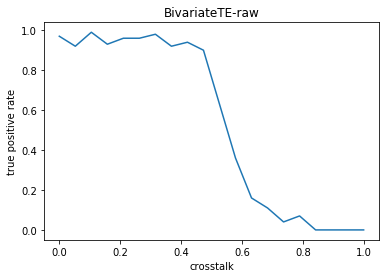

Doing method BivariateTE conv
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
R

Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDO

Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDO

Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDO

Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDO

Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDO

Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDO

Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDO

Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDO

Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDO

Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDO

Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDO

Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDO

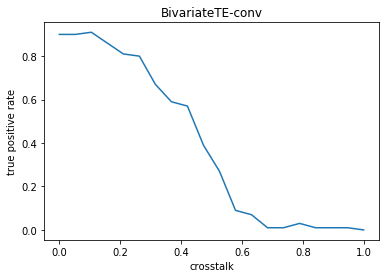

Doing method MultivariateTE raw
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT

Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDO

Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDO

Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDO

Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDO

Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDO

Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDO

Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDO

Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDO

Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDO

Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDO

Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDO

Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDO

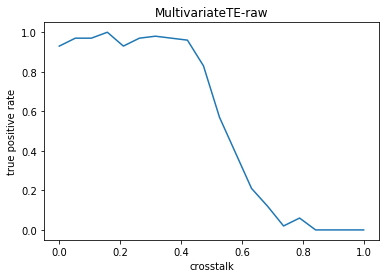

Doing method MultivariateTE conv
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOU

Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428

Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDO

Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDO

Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDO

Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDO

Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDO

Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDO

Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDO

Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDO

Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDO

Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDO

Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDO

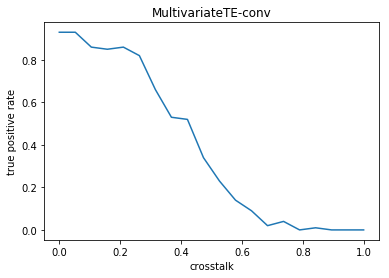

In [11]:
nTest = 20
maxLag = 5

idtxlParam = {
    'dim_order'       : 'ps',
    'cmi_estimator'   : 'JidtGaussianCMI',
    'max_lag_sources' : maxLag,
    'min_lag_sources' : 1,
    'parallelTrg' : False
}

for method in ['BivariateTE', 'MultivariateTE']:
    for haveConv in [False, True]:
        convID = "raw" if not haveConv else "conv"
        print('Doing method', method, convID)
        
        crossTalkLst = np.linspace(0, 1, 20)
        accLst = []
        
        for crossTalk in crossTalkLst:
            rezMat = np.zeros((maxLag+1, maxLag+1))
            for lagTrue in range(1, maxLag+1):
                for iTest in range(nTest):
                    if not haveConv:
                        data = two_node_system(200, [lagTrue], [0.5], noiseFrac=0.01, crossYX=crossTalk)
                    else:
                        data = two_node_system(200, [lagTrue], [0.5], noiseFrac=0.01, crossYX=crossTalk, convDT=0.05, convTau=0.5)
                    mc.set_data(data, 'ps')
                    rez = mc.metric3D(method, '', metricSettings=idtxlParam)
                    if not np.isnan(rez[1, 0, 1]):
                        lagEst = int(rez[1, 0, 1])
                        rezMat[lagTrue][lagEst] += 1
                
            if not haveConv:
                accLst += [acc(rezMat[1:, 1:], nTest)]
            else:
                accLst += [acc_te_lag_corrected(rezMat[1:, 1:], nTest)]

        plt.figure()
        plt.title(method + '-' + convID)
        plt.xlabel('crosstalk')
        plt.ylabel('true positive rate')
        plt.plot(crossTalkLst, accLst)
        plt.savefig("crosstalk_"+method+"_" + convID + ".pdf")
        plt.show()

Doing method BivariateTE
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redire

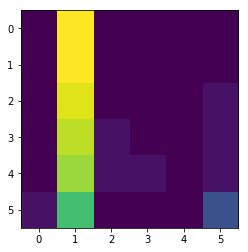

Doing method MultivariateTE
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Redirecting STDOUT to log_26428.txt
Resumed STDOUT
Red

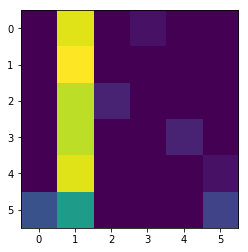

In [6]:
nTest = 20
maxLag = 5

idtxlParam = {
    'dim_order'       : 'ps',
    'cmi_estimator'   : 'JidtGaussianCMI',
    'max_lag_sources' : maxLag,
    'min_lag_sources' : 0,
    'parallelTrg' : False
}

for method in ['BivariateTE', 'MultivariateTE']:
    print('Doing method', method)
    rezMat = np.zeros((maxLag+1, maxLag+1))
    for lagTrue in range(0, maxLag+1):
        for iTest in range(nTest):
            data = two_node_system(200, [lagTrue], [0.5], noiseFrac=0.01, convDT=0.05, convTau=0.5, crossYX=0.2)
            mc.set_data(data, 'ps')
            rez = mc.metric3D(method, '', metricSettings=idtxlParam)            
            if not np.isnan(rez[1, 0, 1]):
                lagEst = int(rez[1, 0, 1])
                rezMat[lagTrue][lagEst] += 1
    
    print("Accuracy", acc(rezMat, nTest))
    print("Accuracy-corrected", acc_te_lag_corrected(rezMat, nTest))
    
    plt.figure()
    plt.imshow(rezMat)
    plt.show()